# Simple circuits 2024

In [2]:
preparser(False)

In [2]:
import qiskit
qiskit.version.get_version_info()

'1.2.4'

## 1. Toffoli circuit

### Part (a)

Begin by running this circuit on the simulator.

### Creating the circuit

In [3]:
from qiskit import *

In [4]:
# create 3 quantum registers, one for each qubit
q=QuantumRegister(3)
# create 3 corresponding classical registers (needed for storing measurement results)
c=ClassicalRegister(3)
# create a quantum circuit with these registers
toffoli = QuantumCircuit(q,c)
# NOT gates on q[1] and q[2]
toffoli.x(q[1])
toffoli.x(q[2])
# barrier to prevent gate reordering (not necessary, but makes visualization look nice) 
toffoli.barrier()
# double-controlled-NOT (Toffoli) gate; controls={q[2],q[1]};  target=q[0]
toffoli.ccx(q[2], q[1], q[0])
# cNOT (controlled-NOT) gate; control=q[2];  target=q[1]
toffoli.cx(q[2],q[1])
toffoli.barrier()
# measurement gates
toffoli.measure(q, c)

### Visualizing the circuit

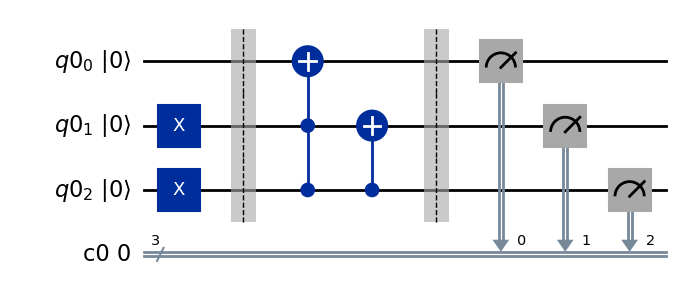

In [5]:
toffoli.draw(output='mpl', initial_state=True)

### Running the circuit on the local qasm simulator

In [6]:
from qiskit_aer import Aer

simulator = Aer.get_backend('qasm_simulator')

In [7]:
# We've set the number of shots (repeats) of the circuit to be 4096.
# (The default number of shots on the simulator is 1024.)
job_sim_toffoli = simulator.run(toffoli, shots=4096)

In [8]:
# Grab the results from the job
result_sim_toffoli = job_sim_toffoli.result()

In [9]:
counts_sim_toffoli = result_sim_toffoli.get_counts()
print(counts_sim_toffoli)

{'101': 4096}


In [ ]:
# plot_histogram

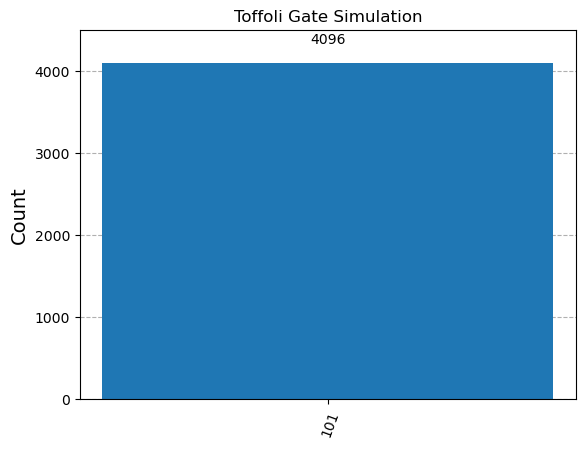

In [17]:
# Plot a histogram of the results
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_toffoli,
    title="Toffoli Gate Simulation")

### Explain what the circuit does



The circuit prepares the qubits, applies a series of logic gates to transform them, and then measures the qubits to record the final states. \
The `quantum circuit` initializes three quantum registers and their classical, applying `NOT gates` to `flip the states of the second and third qubits` to $|1\rangle$.\
`Toffoli gate` that flips the `first` qubit if both control qubits are $|1\rangle$. Next, a `CNOT gate` flips the `second qubit` if the `third qubit` is $|1\rangle$. 

- `The Toffoli gate`, is used to prepare the `State` for it to be measure and in this case it is colapsing in |101> state with 100 % certainity

### Part (b)

Re-run the circuit on the simulator. Do the results change? Why or why not?



- The results are `not changing` as the gate is is collapsing in |101> state with 100 % certainity

In [ ]:
# simulator(seed)

In [21]:
job_sim_toffoli = simulator.run(toffoli, shots=4096)
result_sim_toffoli = job_sim_toffoli.result()
counts_sim_toffoli = result_sim_toffoli.get_counts()
print(counts_sim_toffoli)

{'101': 4096}


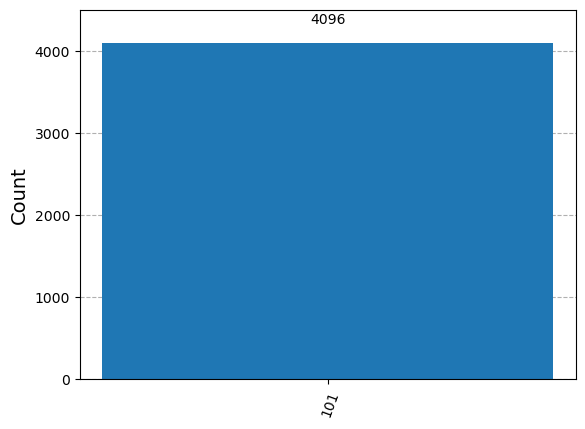

In [22]:
from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_toffoli)

___

- The results are `not changing` as the gate is is collapsing in |101> state with 100 % certainity

___________________________________________________

### Part (c)

Finally, run the circuit on a real device. Compare with the simulation, and account for differences.



### Running the circuit on a real device 

In [23]:
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

In [32]:
# The FIRST time that you run on an IBM backend, you must save your account number, as follows:
# QiskitRuntimeService.save_account(token="2e8f615a30f2218a2723c2b8b4b7755ca351d9476541dc7f2b3501882460cce6f8e25f791bc37fd8543631671604cf7360ccf8bec8305d027210a855dc55635a",channel="ibm_quantum", overwrite=True)

In [33]:
# Loads your personal account number, which you have previously saved
service = QiskitRuntimeService()

In [35]:
# Available IBM devices that are NOT a simulator
service.backends(simulator=False, operational=True)

# We choose the least-busy IBM device that is NOT a simulator
backend = service.least_busy(simulator=False, operational=True)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


# we use a transpiler to get an ISA circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_toffoli = pm.run(toffoli)


# We initialize the Sampler, and invoke the run() method to generate the output
# The default number of shots on the Sampler is 4096
sampler = Sampler(backend)
job_exp_toffoli = sampler.run([isa_toffoli])


jobid = job_exp_toffoli.job_id()
jobid


/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:273: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseQobjInstruction`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  return cls(data["name"], data["t0"], **in_data)
/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:576: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseLibraryItem`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely r

'cx9zzw7pjw30008h57gg'

In [37]:
# Available IBM devices that are NOT a simulator
service.backends(simulator=False, operational=True)

[<IBMBackend('ibm_brisbane')>,
 <IBMBackend('ibm_kyiv')>,
 <IBMBackend('ibm_sherbrooke')>]

In [18]:
# We choose the least-busy IBM device that is NOT a simulator
backend = service.least_busy(simulator=False, operational=True)

In [19]:
backend.name

'ibm_brisbane'

In [20]:
# Alternative:
# backend = service.backend("ibm_brisbane")

In [21]:
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

In [22]:
# we use a transpiler to get an ISA circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_toffoli = pm.run(toffoli)

/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit_ibm_provider/api/session.py:19: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  import pkg_resources
/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit_ibm_provider/ibm_backend.py:24: DeprecationWarning: qiskit.providers.models is deprecated since Qiskit 1.2 and will be removed in Qiskit 2.0. With the removal of Qobj, there is no need for these schema-conformant objects. If you still need to use them, it could be because you are using a BackendV1, which is also deprecated in favor of BackendV2.
  from qiskit.providers.models import (
/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit_ibm_provider/job/ibm_job.py:22: DeprecationWarning: qiskit.providers.models is deprecated since Qiskit 1.2 and will be removed in Qiskit 2.0. With the removal of Qobj, there is no 

In [23]:
# We initialize the Sampler, and invoke the run() method to generate the output
# The default number of shots on the Sampler is 4096
sampler = Sampler(backend)
job_exp_toffoli = sampler.run([isa_toffoli])

In [38]:
jobid = job_exp_toffoli.job_id()
jobid

'cx9zzw7pjw30008h57gg'

In [40]:
job_exp_toffoli.status()

'RUNNING'

You can monitor your job (for example, view the estimated time for it to finish, or even cancel it) by pointing your browser to your personal IBM Quantum Platform homepage

     https://quantum.ibm.com

 and then clicking on "Workloads". 

In [42]:
job_exp_toffoli.status()

'DONE'

In [43]:
# If there is an error, you can get more information:
#job_exp_toffoli.error_message()

If you need to retrieve a job that already finished running:

Look up (on your Workloads page, see above) the job ID (here, cw7cyjajyrs0008gparg ).
Then:

jobid='cw7cyjajyrs0008gparg'

retrieved_job = service.job(jobid)

result_exp_toffoli = retrieved_job.result()

In [44]:
result_exp_toffoli = job_exp_toffoli.result()

In [45]:
print(result_exp_toffoli[0].data)
#See https://quantumcomputing.stackexchange.com/questions/38780/how-to-run-the-qiskit-sampler-after-storing-measurement-results-on-classical-qub

DataBin(c0=BitArray(<shape=(), num_shots=4096, num_bits=3>))


In [46]:
counts_exp_toffoli = result_exp_toffoli[0].data.c0.get_counts()
print(counts_exp_toffoli)

{'101': 3463, '111': 228, '000': 10, '110': 65, '100': 134, '010': 66, '011': 97, '001': 33}


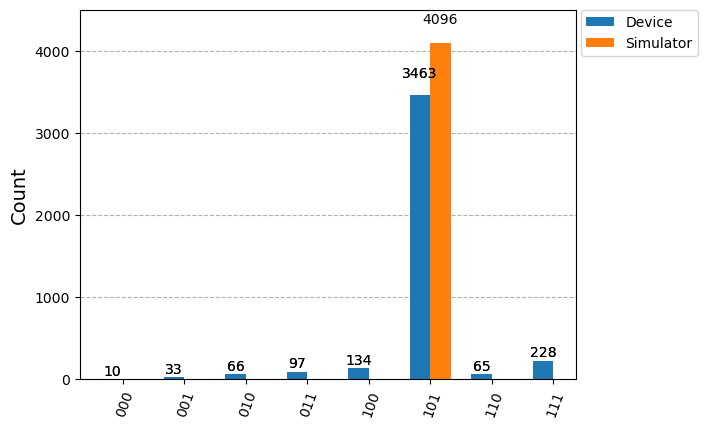

In [52]:
from qiskit.visualization import plot_histogram

histogram = plot_histogram([counts_exp_toffoli, counts_sim_toffoli], legend=['Device', 'Simulator'])
histogram


In [178]:
# Calculate the frequency percentage for each key
frequencies = {key: (value / sum(counts_exp_toffoli.values())) * 100 for key, value in counts_exp_toffoli.items()}

# Print the frequencies
for key, percentage in frequencies.items():
    print(f"{key}: {percentage:.2f}%")


101: 84.55%
111: 5.57%
000: 0.24%
110: 1.59%
100: 3.27%
010: 1.61%
011: 2.37%
001: 0.81%


- The results are different
  - The Simulator is perfoming well and measuring the state |101> state with 100 % certainity
  - The real device is getting measurements of the states as below:
    * 101: 84.55%
    * 111: 5.57%
    * 000: 0.24%
    * 110: 1.59%
    * 100: 3.27%
    * 010: 1.61%
    * 011: 2.37%
    * 001: 0.81%
   
As a result of the `IBM Quantum computer` tries to make a 3 quibit gate using `1 and 2 qubits` which is complicated.

# 2. Bell circuit

### Part (a)

Begin by running this circuit on the simulator.

### Creating the circuit

In [ ]:
# from qiskit import *

In [54]:
q=QuantumRegister(2)
c=ClassicalRegister(2)
bell = QuantumCircuit(q,c)
bell.h(q[0])
bell.cx(q[0],q[1])
bell.barrier()
bell.measure(q, c)

### Visualizing the circuit

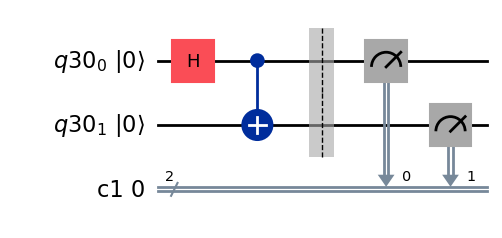

In [57]:
bell.draw(output='mpl', initial_state=True)

### Running the circuit on the local qasm simulator

In [ ]:
# from qiskit_aer import Aer
# simulator = Aer.get_backend('qasm_simulator')

In [60]:
job_sim_bell = simulator.run(bell, shots=4096)
result_sim_bell = job_sim_bell.result()
counts_sim_bell = result_sim_bell.get_counts()
print(counts_sim_bell)

{'11': 2005, '00': 2091}


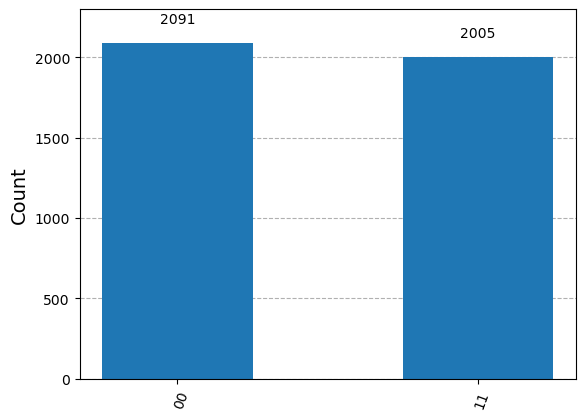

In [62]:
# from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_bell)

### Explain what the circuit does



The circuit prepares an entangled Bell state between two qubits and then measures both qubits to record their states. The Hadamard gate creates a superposition, and the CNOT gate entangles the qubits, ensuring that the measurement results are correlated

### Part (b) 

Re-run the circuit on the simulator. Do the results change? Why or why not?


In [64]:
job_sim_bell = simulator.run(bell, shots=4096)
result_sim_bell = job_sim_bell.result()
counts_sim_bell = result_sim_bell.get_counts()
print(counts_sim_bell)

{'00': 2053, '11': 2043}


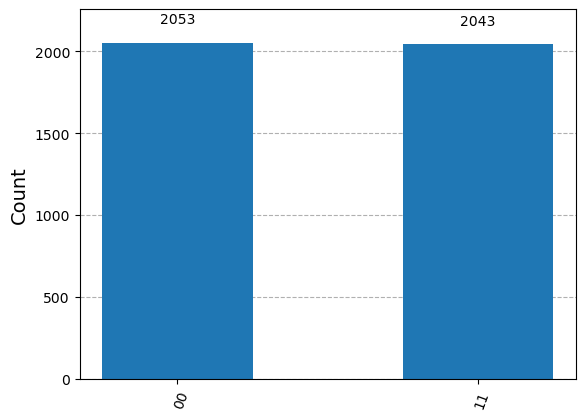

In [65]:
# from qiskit.visualization import plot_histogram
plot_histogram(counts_sim_bell)

### Re Running 5 times and observe

In [70]:

results = []
for i in range(5):
    rerun = simulator.run(bell, shots=4096)
    result_sim_bell = job_sim_bell.result()
    counts_sim_bell = result_sim_bell.get_counts()
    print(counts_sim_bell)

{'00': 2053, '11': 2043}
{'00': 2053, '11': 2043}
{'00': 2053, '11': 2043}
{'00': 2053, '11': 2043}
{'00': 2053, '11': 2043}


The results are `not changing` as the measurement on the `bell state` has equal chances of 50\% ..  $|00 \rangle$ and 50\%   $|11 \rangle$ \
This reflects the `property` of the `Bell state`, where the probabilities of measuring $∣00⟩|00\rangle \quad \text{and}  ∣11⟩|11\rangle$ are indeed both 50%.



### Part (c)

Finally, run the circuit on a real device. Compare with the simulation, and account for differences.

### Running the circuit on a real device

In [ ]:
#from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler
#service = QiskitRuntimeService()
#backend = service.least_busy(simulator=False, operational=True)
#from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
#pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
#sampler = Sampler(backend)

In [49]:
backend.name

'ibm_brisbane'

In [74]:
isa_bell = pm.run(bell)

In [75]:

job_exp_bell = sampler.run([isa_bell])

In [76]:
jobid = job_exp_bell.job_id()
jobid

'cxa0ks7tpsjg008cepgg'

In [92]:
job_exp_bell.status()

'DONE'

In [93]:
job_exp_bell.status()

'DONE'

In [94]:
result_exp_bell = job_exp_bell.result()

In [95]:
print(result_exp_bell[0].data)

DataBin(c1=BitArray(<shape=(), num_shots=4096, num_bits=2>))


In [97]:
counts_exp_bell = result_exp_bell[0].data.c1.get_counts()
print(counts_exp_bell)

{'01': 189, '11': 1999, '00': 1764, '10': 144}


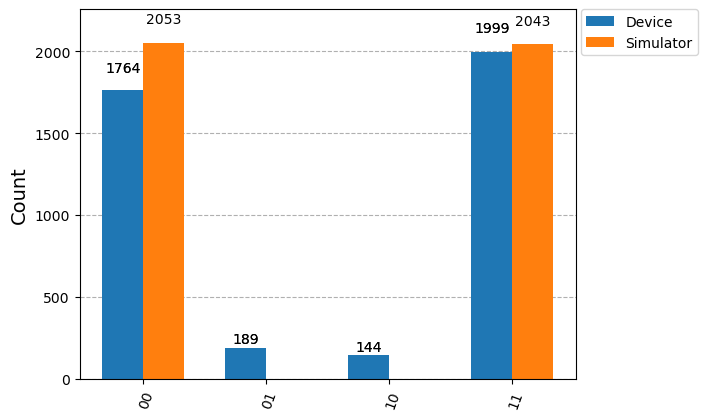

In [98]:
plot_histogram([counts_exp_bell,counts_sim_bell], legend=['Device', 'Simulator'])

In [179]:
# Calculate the frequency percentage for each key
frequencies = {key: (value / sum(counts_exp_bell.values())) * 100 for key, value in counts_exp_bell.items()}

# Print the frequencies
for key, percentage in frequencies.items():
    print(f"{key}: {percentage:.2f}%")


01: 4.61%
11: 48.80%
00: 43.07%
10: 3.52%


The `simulator` is getting the the measurement on the `bell state` has equal chances of 50\% ..  $|00 \rangle$ and 50\%   $|11 \rangle$ \
While the `IBM` real device is  have other two gates that should not be there as the theoretically have probalities of 0, however, the  $|00 \rangle$ and   $|11 \rangle$ states have high probalities 48.8\% and 43.07\% 

## 3. Dense coding circuits

### Part (a)

Run the circuit for the case 11 on the simulator. Does it give the expected result?

#### The case 11

In [99]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense11 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense11.h(q[0])
dense11.cx(q[0], q[1])
dense11.barrier()
# To send the message 11, Alice applies first X and then Z to her qubit
dense11.x(q[0])
dense11.z(q[0])
dense11.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense11.cx(q[0], q[1])
dense11.h(q[0])
dense11.barrier()
# Bob then measures both qubits
dense11.measure(q, c)

### Visualizing the circuit

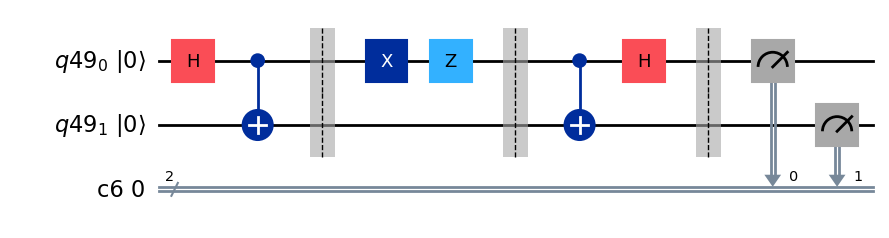

In [100]:
dense11.draw(output='mpl', initial_state=True)

## Yes, it is giving the expected Results

### Running the circuit on the local qasm simulator

In [101]:
job_sim_dense11 = simulator.run(dense11, shots=4096)
result_sim_dense11 = job_sim_dense11.result()
counts_sim_dense11 = result_sim_dense11.get_counts()
print(counts_sim_dense11)

{'11': 4096}


### Explain briefly what the circuit does



The quantum circuit initializes with two `qubits` and corresponding `classical registers`. \
It begins by entangling the qubits using a `Hadamard` gate on $ q[0] $ followed by a `CNOT` gate, establishing a shared `Bell state` between Alice's qubit $ q[0] $ and Bob's qubit $ q[1] $. \
Alice encodes the message `"11"` by applying `X and Z` gates to her qubit. After Alice `"sends"` her qubit to Bob, 
he applies a `CNOT` gate and then a `Hadamard gate` to his qubit to decode the message. 

Both qubits are measured, and the results are recorded, `completing the teleportation and retrieval of the encoded message.`

### Part (b)

Modify the code, and run on the simulator, for the other three cases (namely, 01, 10 and 00). Make sure the circuits are drawn for each of the cases. Do you obtain the expected results?


#### The case 01

In [102]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense01 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense01.h(q[0])
dense01.cx(q[0], q[1])
dense01.barrier()
# To send the message 01, Alice applies first X and then Z to her qubit
# dense01.x(q[0])
dense01.z(q[0])
dense01.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense01.cx(q[0], q[1])
dense01.h(q[0])
dense01.barrier()
# Bob then measures both qubits
dense01.measure(q, c)

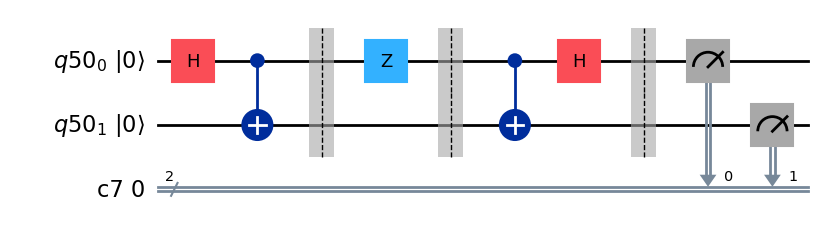

In [103]:
dense01.draw(output='mpl', initial_state=True)

In [104]:
job_sim_dense01 = simulator.run(dense01, shots=4096)
result_sim_dense01 = job_sim_dense01.result()
counts_sim_dense01 = result_sim_dense01.get_counts()
print(counts_sim_dense01)

{'01': 4096}


## Yes, it is giving the expected Results

#### The case 10


In [105]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense10 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense10.h(q[0])
dense10.cx(q[0], q[1])
dense10.barrier()
# To send the message 10, Alice applies first X and then Z to her qubit
dense10.x(q[0])
# dense10.z(q[0])
dense10.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense10.cx(q[0], q[1])
dense10.h(q[0])
dense10.barrier()
# Bob then measures both qubits
dense10.measure(q, c)

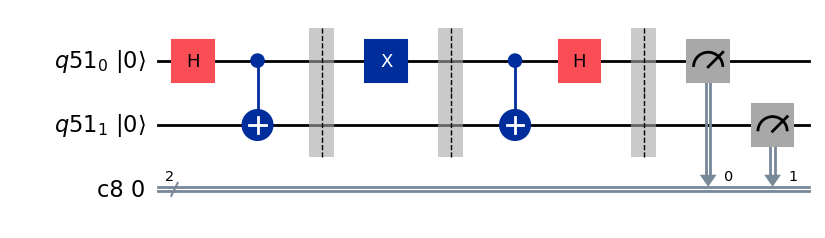

In [106]:
dense10.draw(output='mpl', initial_state=True)

In [107]:
job_sim_dense10 = simulator.run(dense10, shots=4096)
result_sim_dense10 = job_sim_dense10.result()
counts_sim_dense10 = result_sim_dense10.get_counts()
print(counts_sim_dense10)

{'10': 4096}


## Yes, it is giving the expected Results

#### The case 00

In [108]:
q = QuantumRegister(2)
c = ClassicalRegister(2)
dense00 = QuantumCircuit(q,c)
# We create an entangled pair of qubits; Alice has one (q[0]) , and Bob has the other one (q[1])
dense00.h(q[0])
dense00.cx(q[0], q[1])
dense00.barrier()
# To send the message 00, Alice applies first X and then Z to her qubit
# dense00.x(q[0])
# dense00.z(q[0])
# dense00.barrier()
# Alice now sends her qubit to Bob
# Now that Bob has both qubits, he proceeds to retrieve Alice's message 
# Bob applies a cNOT and then H
dense00.cx(q[0], q[1])
dense00.h(q[0])
dense00.barrier()
# Bob then measures both qubits
dense00.measure(q, c)

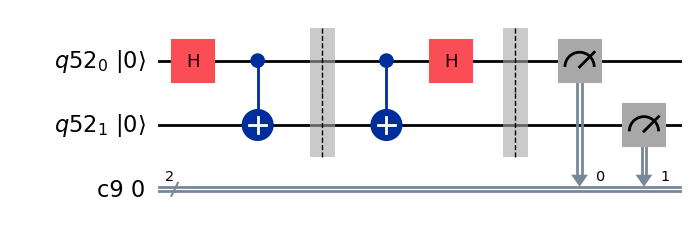

In [109]:
dense00.draw(output='mpl', initial_state=True)

In [110]:
job_sim_dense00 = simulator.run(dense00, shots=4096)
result_sim_dense00 = job_sim_dense00.result()
counts_sim_dense00 = result_sim_dense00.get_counts()
print(counts_sim_dense00)

{'00': 4096}


## Yes, it is giving the expected Results

### Part (c) 

Run the circuit for the case 11 on a real device; compare with the simulation, and account for differences.

### Running the circuit on a real device

In [89]:
# Available IBM devices that are NOT a simulator
service.backends(simulator=False, operational=True)

# We choose the least-busy IBM device that is NOT a simulator
backend = service.least_busy(simulator=False, operational=True)
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager


# we use a transpiler to get an ISA circuit
pm = generate_preset_pass_manager(backend=backend, optimization_level=1)
isa_dense11 = pm.run(dense11)


# We initialize the Sampler, and invoke the run() method to generate the output
# The default number of shots on the Sampler is 4096
sampler = Sampler(backend)
job_exp_dense11 = sampler.run([isa_dense11])





/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:273: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseQobjInstruction`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely relies on deprecated functionality and should be updated to use `BackendV2`.
  return cls(data["name"], data["t0"], **in_data)
/srv/sage-10.4/local/var/lib/sage/venv-python3.11/lib/python3.11/site-packages/qiskit/qobj/pulse_qobj.py:576: DeprecationWarning: The class ``qiskit.qobj.pulse_qobj.PulseLibraryItem`` is deprecated as of qiskit 1.2. It will be removed in the 2.0 release. The `Qobj` class and related functionality are part of the deprecated `BackendV1` workflow,  and no longer necessary for `BackendV2`. If a user workflow requires `Qobj` it likely r

In [111]:

jobid = job_exp_dense11.job_id()
jobid

'cxa0mjtrkac00089n060'

In [112]:
job_exp_dense11.status()



'DONE'

In [114]:
result_exp_dense11 =job_exp_dense11.result()

print(result_exp_dense11[0].data)

DataBin(c2=BitArray(<shape=(), num_shots=4096, num_bits=2>))


In [125]:
counts_exp_dense11 = result_exp_dense11[0].data.c2.get_counts()
print(counts_exp_dense11)

{'11': 3863, '01': 142, '10': 79, '00': 12}


In [126]:

counts_exp_dense11 = result_exp_dense11[0].data.c2.get_counts()
print(counts_exp_dense11)

{'11': 3863, '01': 142, '10': 79, '00': 12}


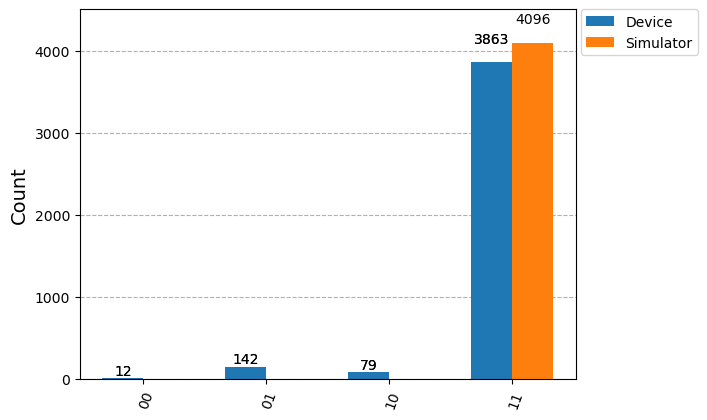

In [127]:
plot_histogram([counts_exp_dense11,counts_sim_dense11], legend=['Device', 'Simulator'])

## 4. Teleportation


Consider the teleportation circuit.
Note that the ``unknown'' state here is given by

$$ |\psi\rangle = R^{(y)}(\alpha) |0\rangle
   = e^{i \alpha\, \sigma^{y} /2} |0\rangle = 
   \cos(\tfrac{\alpha}{2}) |0\rangle  - \sin(\tfrac{ \alpha}{2}) 
     |1\rangle  $$

with $\alpha=\pi/4$. (Recall Equations (7) and (8) in Problem Set 1 !)

### Part (a)

For the state $|\psi\rangle$, compute the probabilities

$$ \big\vert\langle 0|\psi\rangle\big\vert^{2}  \qquad \text{ and } 
	\qquad \big\vert\langle 1|\psi\rangle\big\vert^{2}  $$

of measuring 0 and 1, respectively.



$$
|\psi\rangle = R^{(y)}(\alpha) |0\rangle
= e^{i \alpha\, \sigma^{y} /2} |0\rangle = 
\cos\left(\tfrac{\alpha}{2}\right) |0\rangle - \sin\left(\tfrac{\alpha}{2}\right) |1\rangle
$$



with $\alpha = \pi/4$.

### Part (a)

For the state $|\psi\rangle$, compute the probabilities




$$
P(0)=\big\vert \langle 0|\psi\rangle \big\vert^{2}  \qquad \text{and} \, P(1)= \qquad \big\vert \langle 1|\psi\rangle \big\vert^{2}
$$



of measuring 0 and 1, respectively.

Given $\alpha = \pi/4$, we have:



$$
|\psi\rangle = \cos\left(\tfrac{\pi}{8}\right) |0\rangle - \sin\left(\tfrac{\pi}{8}\right) |1\rangle = 
\begin{pmatrix}
\cos\left(\frac{\alpha}{2}\right) \\
-\sin\left(\frac{\alpha}{2}\right)
\end{pmatrix}$$

and 
$$
|0\rangle = 
\begin{pmatrix}
1\\
0
\end{pmatrix}  \quad , |1\rangle = 
\begin{pmatrix}
0\\
1
\end{pmatrix}$$

The probabilities are:

1. Probability of measuring 0:


$$
P(0)= \big\vert \langle 0|\psi\rangle \big\vert^{2} = \left( \cos\left(\tfrac{\pi}{8}\right) \right)^2 = \cos^2\left(\tfrac{\pi}{8}\right)  \approx 0.854
$$


2. Probability of measuring 1:


$$
P(1)=\big\vert \langle 1|\psi\rangle \big\vert^{2} = \left( \sin\left(\tfrac{\pi}{8}\right) \right)^2 = \sin^2\left(\tfrac{\pi}{8}\right)  \approx 0.146
$$



In [173]:
# Define the angle alpha
alpha = pi / 4

# Define the state |psi>
psi = matrix([[cos(alpha / 2)], [-sin(alpha / 2)]])

# Define the basis states |0> and |1>
ket_0 = matrix([[1], [0]])
ket_1 = matrix([[0], [1]])

# Compute the probabilities
P_0 = (ket_0.transpose() * psi).norm()**2
P_1 = (ket_1.transpose() * psi).norm()**2

# Display the probabilities
show("P(0)= \t \t ", round(P_0,4)*100, "\t \t \t \t \t \t \t" , "P(0)= \t \t ", round(P_1,4)*100)


'P(0)= \t \t ' 85.36 '\t \t \t \t \t \t \t' 'P(0)= \t \t ' 14.64

### Part (b)

Run this circuit on the simulator.

### Creating the circuit

In [ ]:
# from qiskit import *

In [147]:
# We need 3 qubits: one qubit for the "unknown" state to be teleported, and two qubits for the entangled pair
q = QuantumRegister(3)
# corresponding classical registers
c0 = ClassicalRegister(1)
c1 = ClassicalRegister(1)
c2 = ClassicalRegister(1)
teleport = QuantumCircuit(q,c0,c1,c2)

In [148]:
# We create Alice's "unknown" state that she wants to teleport to Bob
# As an example, we take the "unknown" state to be a rotation about the y-axis by angle pi/4 of |0>
# ry() is a 1-qubit gate that performs the rotation
# We call NumPy with "np" to evaluate pi/4
import numpy as np
teleport.ry(np.pi/4,q[0])
teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q55'), 0), Qubit(QuantumRegister(3, 'q55'), 1), Qubit(QuantumRegister(3, 'q55'), 2)), clbits=())

In [149]:
# We create an entangled pair of qubits; Alice has one, and Bob has the other one
teleport.h(q[1])
teleport.cx(q[1], q[2])
teleport.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q55'), 0), Qubit(QuantumRegister(3, 'q55'), 1), Qubit(QuantumRegister(3, 'q55'), 2)), clbits=())

In [150]:
# We now implement the teleportation protocol:
# Alice applies a cNOT to her two qubits, with the control on the qubit in the "unknown" state
teleport.cx(q[0], q[1])
# Alice then applies a Hadamard to the qubit in the "unknown" state
teleport.h(q[0])
teleport.barrier()
# Alice measures both of her qubits
teleport.measure(q[0], c0)
teleport.measure(q[1], c1)
# Depending on the results of Alice's measurements, Bob applies an X or Z, or both, to his qubit
teleport.x(q[2]).c_if(c1, 1)
teleport.z(q[2]).c_if(c0, 1)
# Bob's qubit should now be in the same "unknown" state, which can be verified by measurement:
teleport.measure(q[2], c2)

### Visualizing the circuit

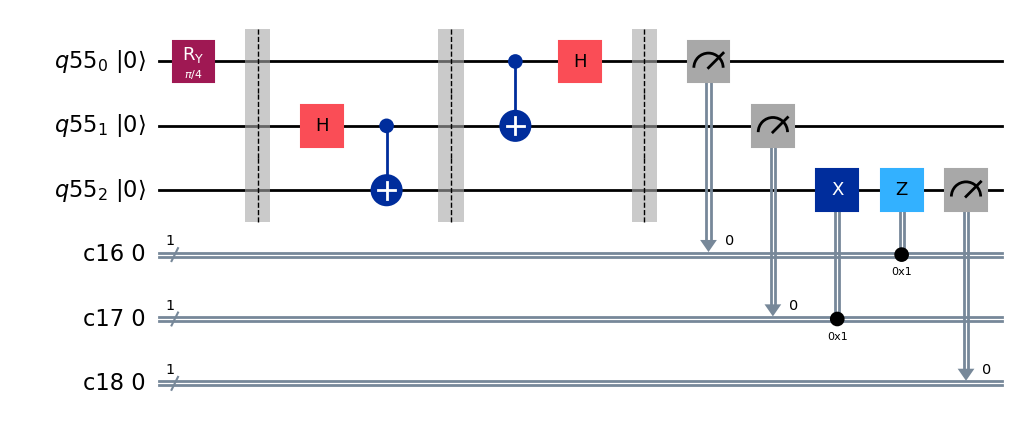

In [151]:
teleport.draw(output='mpl', initial_state=True)

### Running the circuit on the local qasm simulator

In [159]:
teleport_job = simulator.run(teleport, shots=4096)
teleport_result = teleport_job.result()
data = teleport_result.get_counts(teleport)
# Results of measurements of all 3 qubits
print(data)

{'1 1 0': 167, '1 0 0': 150, '1 0 1': 146, '1 1 1': 142, '0 1 1': 865, '0 0 1': 883, '0 1 0': 868, '0 0 0': 875}


In [174]:
# The results of Bob's measurements (c2) are contained in the LEFTmost classical register
# We must sum over all the possible results of Alice's measurements 
# (contained in the middle and rightmost classical registers) to obtain the totals
bob = {}
bob['0'] = data['0 0 0'] + data['0 0 1'] + data['0 1 0'] + data['0 1 1']
bob['1'] = data['1 0 0'] + data['1 0 1'] + data['1 1 0'] + data['1 1 1']

In [175]:
print(bob)

{'0': 3491, '1': 605}


In [176]:
bob['0'] + bob['1'] 

4096

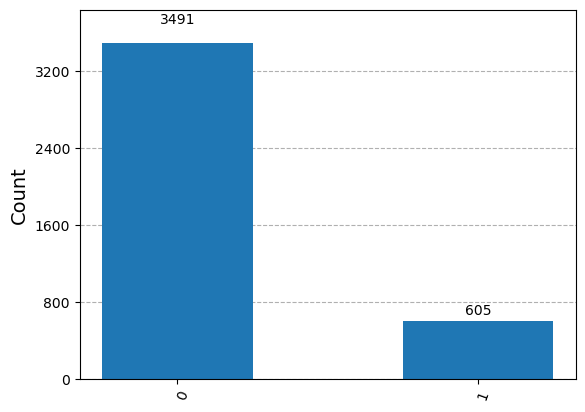

In [177]:
plot_histogram(bob)

### Explain briefly what this circuit does



- **`Entanglement`**: Alice `entangles` her two qubits by applying a `CNOT` gate with the control on the "unknown" state.
- **`Superposition`**: Alice applies a `Hadamard` gate to the `unknown` state qubit.
- **`Measurement`**: Alice measures both of her qubits, collapsing the state
- **`Conditional Operations`**: Bob applies an `X gate` and/or `Z gate` to his qubit based on `Alice's measurement` results to correct the state.
- **`Verification`**: `Bob` measures his qubit to verify it is now in the original `"unknown"` state.

### Part (c)

How do your results compare with the theoretical prediction?

In [153]:
# Calculate the frequency percentage for each key
frequencies = {key: (value / sum(bob.values())) * 100 for key, value in bob.items()}

# Print the frequencies
for key, percentage in frequencies.items():
    print(f"{key}: {percentage:.2f}%")


0: 85.47%
1: 14.53%


`The simulation` results of the `Teleportation` are `approximately` equal the one from the calculations by `Hand` and `SageMath`.